# Core Task 1:

* Calculate the Fraunhofer diffraction pattern of a 1D
complex aperture
* Plot Intensity $I\propto\psi^{2}$ with labelled axes
* Compare results for a single slit with theoretical prediction



In [1]:
"""Importing necessary packages"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Inputting some parameters"""

N= 2**8 # Number of x values
total_extent= 5  # Total extent of aperture (in mm)
x_values = np.linspace(-total_extent / 2, total_extent / 2, N)  # x values (mm)

In [3]:
def single_slit_aperture(x,width):
  single_slit=np.zeros(len(x),dtype=np.complex128)
  for i, value in enumerate(x):
    if abs(value)<=width/2:
      single_slit[i]=1
  return single_slit

#plt.plot(x_values, single_slit_aperture(x_values,0.1))
#plt.show()

def single_slit_diffraction(x,width):
  fourier_term=np.fft.fft(single_slit_aperture(x,width))
  intensity=np.square(np.absolute(np.fft.fftshift(fourier_term)))
  #Optionally add a term to normalise intensity so that it is 1 at the origin
  intensity/=intensity[int(N/2)]
  return intensity

- In Fraunhofer Reigme the frequency values from fft can be related to y by:
$2\pi f \approx \frac{ky}{D}$
- Therefore: $y=\lambda Df$  for wavelength $\lambda$ and screen distance $D$


In [4]:
def get_y_from_freq(wavelength,D,N,total_extent):
  frequency=np.fft.fftfreq(N,total_extent/N)
  frequency_shift=np.fft.fftshift(frequency)
  return wavelength*D*frequency_shift

- Expected theoretical result is given by the fourier transform of a top=hat function
- Expect Intensity $I\propto sinc^{2}(\frac{\pi y d}{\lambda D})$
- Therefore expect first minima to occur at $y=\frac{\lambda D}{d}$
- For given values this is at y=5mm


In [5]:
def theoretical_single_slit_intensity(y,width,wavelength,D):
  intensity=np.square(np.sinc(y*width/(wavelength*D)))
  intensity/=intensity[int(N/2)]
  return intensity


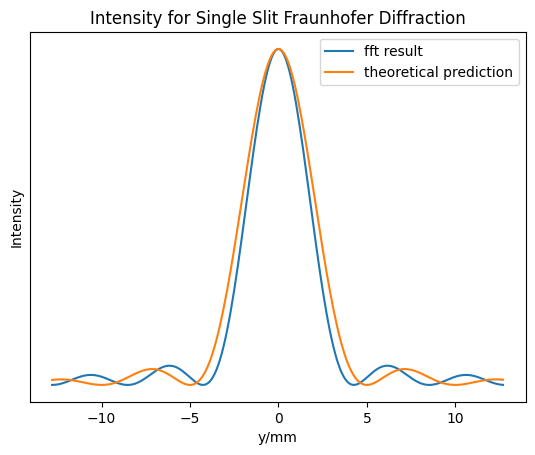

In [6]:
''' Measuring everything in mm
D=1000
Wavelength=0.0005
width=0.1
'''


plt.plot(get_y_from_freq(0.0005,1000,N,total_extent),single_slit_diffraction(x_values,0.1),label='fft result')
plt.plot(get_y_from_freq(0.0005,1000,N,total_extent),theoretical_single_slit_intensity(get_y_from_freq(0.0005,1000,N,total_extent),0.1,0.0005,1000),label='theoretical prediction')
plt.yticks([])
plt.ylabel('Intensity')
plt.xlabel('y/mm')
plt.legend(loc='best')
plt.title('Intensity for Single Slit Fraunhofer Diffraction')
plt.show()

## Conclusions
- Used np.fft to calculate intensity of a diffraction pattern in Fraunhofer regime
- Compared result to theoretical prediciton
- Results show that as N (number of x steps) is increased, the accuracy of the fft model increases and it more closely matches the theoretical prediction

# Core Task 2:

- Plot Fraunhofer pattern for sinusoidal phase grating

In [7]:
new_N=2**20
new_total_extent=5000
new_x_values=np.linspace(-new_total_extent/2,new_total_extent/2,new_N)

def sinusoidal_phase_aperture(x,width,m,s):
  sine_slit=np.zeros(len(x), dtype=np.complex128)
  for i, value in enumerate(x):
    if abs(value)<=width/2:
        sine_slit[i]=np.exp(complex(0,m/2*np.sin(2*np.pi*value/s)))
  return sine_slit



def single_slit_sine_diffraction(x,width,m,s):
  fourier_term=np.fft.fft(sinusoidal_phase_aperture(x,width,m,s))
  intensity=np.square(np.absolute(np.fft.fftshift(fourier_term)))
  #Optionally add a term to normalise intensity so that it is 1 at the origin

  return intensity

sine_grating_y=get_y_from_freq(0.0005,10000,new_N,new_total_extent)


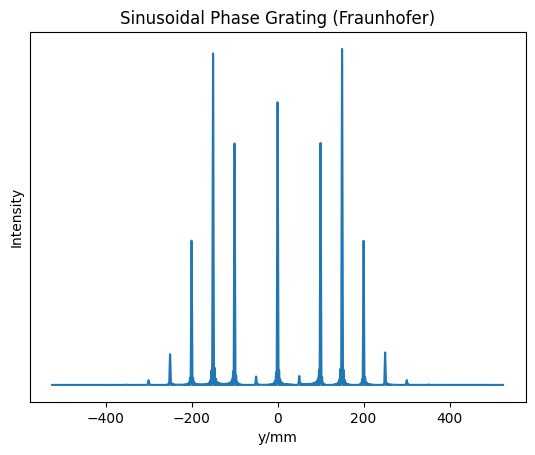

In [8]:
plt.plot(sine_grating_y,single_slit_sine_diffraction(new_x_values,2,8,0.1))
#plt.plot(sine_grating_y,single_slit_sine_diffraction(new_x_values,2,16,0.1))
#plt.plot(sine_grating_y,single_slit_sine_diffraction(new_x_values,2,64,0.1))
plt.yticks([])
plt.ylabel('Intensity')
plt.xlabel('y/mm')

plt.title('Sinusoidal Phase Grating (Fraunhofer)')
plt.show()

## Conclusions
- Plotted diffraction pattern for sinusoidal phase grating
- Intensity pattern shares resemblance to that of an amplitude grating with a large number of slits
  - There is an array of sharp diffraction orders (intensity spikes) with regular spacing between them
  - These orders are modulated in intensity and fall off to $0$ for large $y$
- Experimenting with $m$,$s$ and $N$ values shows that:
  - Increasing $m$ shrinks the diffraction pattern horizontally
  - Changing $s$ leaves the orders at the same $y$ values but affects the intensity modulating function, as $s$ is increased the two symmetric intensity maxima spread further away from $y=0$, more orders are visible and the intensity is split more evenly between these orders.
  - Changing $N$ improves the resolution of the intensity spikes

# Core Task 3:

- Adjust code to allow for near field calculations
- Repeat plots for single slit and sinusoidal phase grating

In [9]:
'''Create a function to adjust the aperture functions'''



def adjust_aperture(x,standard_aperture,wavelength,D):

  for i,xvals in enumerate(x):
    standard_aperture[i]=np.multiply(standard_aperture[i],np.exp(complex(0,np.pi*xvals**2/(D*wavelength))))

  return standard_aperture



'''Create function that calculates adjusted aperture specifically for single slit'''

def adjusted_single_slit(x,width,wavelength,D):
  original_aperture=single_slit_aperture(x,width)
  adjusted_aperture= adjust_aperture(x,original_aperture,wavelength,D)
  return adjusted_aperture

def single_slit_diffraction_adjusted(x,width,wavelength,D):
  fourier_term=np.fft.fft(adjusted_single_slit(x,width,wavelength,D))
  intensity=np.square(np.absolute(np.fft.fftshift(fourier_term)))


  return intensity




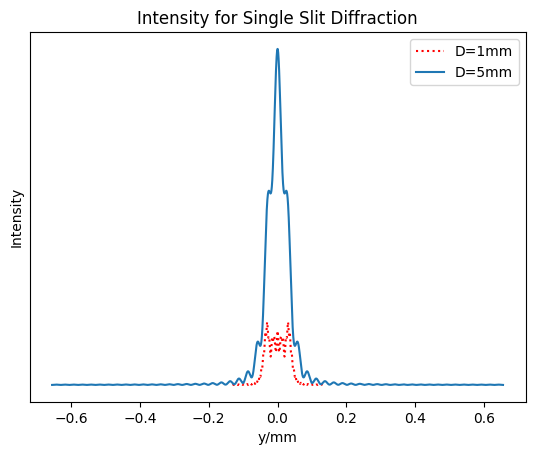

In [10]:
'''Plot for single slit'''

fresnel_N= 2**19 # Number of x values
fresnel_total_extent= 1000 # Total extent of aperture (in mm)
fresnel_x_values = np.linspace(-fresnel_total_extent / 2, fresnel_total_extent / 2, fresnel_N)  # x values (mm)





plt.plot(get_y_from_freq(0.0005,1,fresnel_N,fresnel_total_extent),single_slit_diffraction_adjusted(fresnel_x_values,0.1,0.0005,1),'r:',label='D=1mm')
plt.plot(get_y_from_freq(0.0005,5,fresnel_N,fresnel_total_extent),single_slit_diffraction_adjusted(fresnel_x_values,0.1,0.0005,5),label='D=5mm')

plt.legend(loc='best')


plt.yticks([])
plt.ylabel('Intensity')
plt.xlabel('y/mm')

plt.title('Intensity for Single Slit Diffraction')
plt.show()

In [11]:
def adjusted_sine_slit(x,width,m,s,wavelength,D):
  original_aperture=sinusoidal_phase_aperture(x,width,m,s)
  adjusted_aperture= adjust_aperture(x,original_aperture,wavelength,D)
  return adjusted_aperture

def sine_slit_diffraction_adjusted(x,width,m,s,wavelength,D):
  fourier_term=np.fft.fft(adjusted_sine_slit(x,width,m,s,wavelength,D))
  intensity=np.square(np.absolute(np.fft.fftshift(fourier_term)))


  return intensity




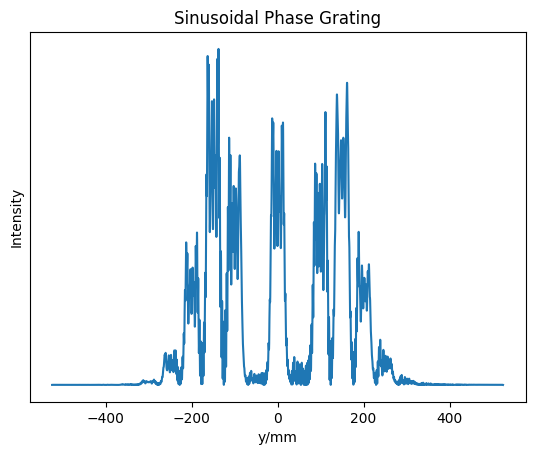

In [12]:
plt.plot(sine_grating_y,sine_slit_diffraction_adjusted(new_x_values,2,8,0.1,0.0005,500))
#plt.plot(sine_grating_y,sine_slit_diffraction_adjusted(new_x_values,2,16,0.1,0.0005,500))
#plt.plot(sine_grating_y,sine_slit_diffraction_adjusted(new_x_values,2,32,0.1,0.0005,500))
plt.yticks([])
plt.ylabel('Intensity')
plt.xlabel('y/mm')

plt.title('Sinusoidal Phase Grating')
plt.show()

## Conclusions
- Single slit shows expected fresnel behaviour
- The intensity pattern from the phase grating looks like the convolution of  a single slit, fresnel pattern with the original fraunhofer phase grating pattern. The sharp diffraction orders are now replaced by patterns that resemble a single slit fresnel pattern.

# Supplementary Task 1:
- Plot fresnel integrals using scipy

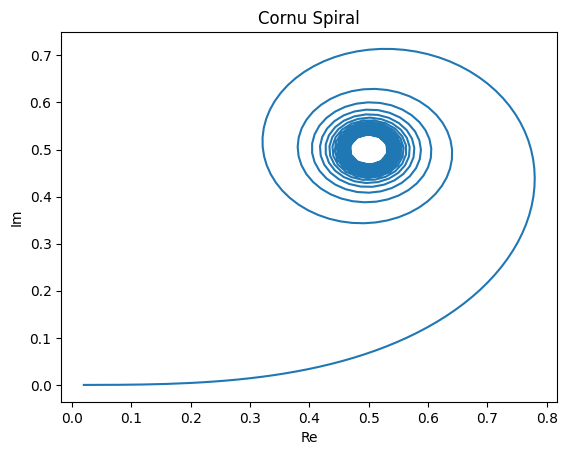

In [14]:
from scipy import integrate #Import necessary module


def cornu_real(u):
  integrand=lambda x: np.cos(np.pi*x**2/2)
  if u>0:

    return integrate.quad(integrand,0,u)[0]
  elif u<0:
    return -integrate.quad(integrand,0,(-u))[0]

def cornu_imaginary(u):
  integrand=lambda x: np.sin(np.pi*x**2/2)
  if u>0:

    return integrate.quad(integrand,0,u)[0]
  elif u<0:
    return -integrate.quad(integrand,0,(-u))[0]




num_u_vals=500
u_range=10
u_values =np.linspace(0,u_range,num_u_vals)

def evaluate_spiral(u_values):
  spiral_real=np.zeros(len(u_values),dtype=np.complex128)
  spiral_imag=np.zeros(len(u_values),dtype=np.complex128)
  for i,value in enumerate(u_values):
    spiral_real[i]=cornu_real(value)
    spiral_imag[i]=cornu_imaginary(value)
  return spiral_real,spiral_imag



plt.plot(*evaluate_spiral(u_values))
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Cornu Spiral')
plt.show()


## Conclusion
- Effectively plotted cornu spiral using scipy.quad.integrate

# Supplementary Task 2:
- Use cornu spiral to plot single slit diffraction pattern

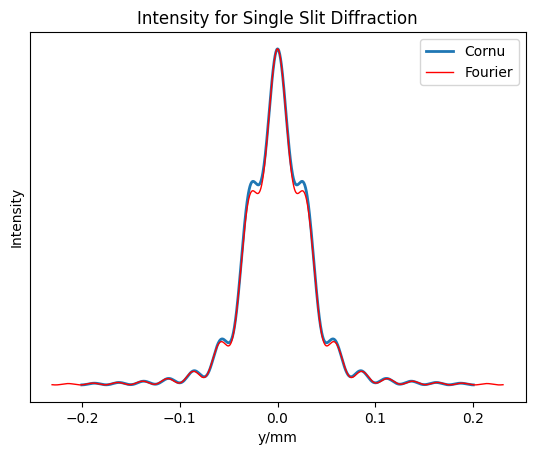

In [15]:


'''Make a function that relates y values on screen to a pair of x values that serve as the limits of the fresnel integrals'''

def make_x_pair(y_value,width):
  x=np.zeros(2)
  x[0]=np.add(y_value, width/2)
  x[1]=np.subtract(y_value,width/2)

  return x



'''Make a generic function to convert a pair of x values to a pair of u values'''

def u_pair_from_x(x_pair,wavelength, D):
  u=x_pair*np.sqrt(2/(wavelength*D))

  return u

'''Intensity at a given y is related to the length of the spanning vector of the cornu spiral between the two corresponding x values'''

def length_on_spiral(u_pair):

  length_x=cornu_real(u_pair[1])-cornu_real(u_pair[0])
  length_y=cornu_imaginary(u_pair[1])-cornu_imaginary(u_pair[0])
  return np.add(np.square(length_x),np.square(length_y))

def intensity_for_y(y_values,width,wavelength,D):

  intensity_values=np.zeros(len(y_values))
  for i,value in enumerate(y_values):
    intensity_values[i]=length_on_spiral(u_pair_from_x(make_x_pair(value,width),wavelength,D))
  return intensity_values


y_range=0.4
y_num=1000
y_values=np.linspace(-y_range/2,y_range/2,y_num)

cornu_intensity=intensity_for_y(y_values,0.1,0.0005,5)
'''Normalise intensity for two methods to compare directly'''

normalised_cornu_intensity=cornu_intensity/cornu_intensity[int(y_num/2)]

fourier_intensity=single_slit_diffraction_adjusted(fresnel_x_values,0.1,0.0005,5)
normalised_fourier_intensity=fourier_intensity/fourier_intensity[int(fresnel_N/2)]


plt.plot(y_values,normalised_cornu_intensity,label='Cornu',linewidth=2)
plt.plot(get_y_from_freq(0.0005,5,fresnel_N,fresnel_total_extent)[170000:-170000],normalised_fourier_intensity[170000:-170000],'r',label='Fourier',linewidth=1)

plt.legend(loc='best')
plt.yticks([])
plt.ylabel('Intensity')
plt.xlabel('y/mm')

plt.title('Intensity for Single Slit Diffraction')



plt.show()


## Conclusion
- Using the cornu spiral to calculate the diffraction pattern gives similar results to using fourier methods
- Using the spiral method the intensity pattern can be found accurately with far fewer calculations than using the fourier method